## Introduction

This notebook shows one of possible solutions to decrypt ciphertext with diff=2.

Notebook is based on the assumption that cipher is transpositional: ciphertext's character frequences are not changed, but are appeared in different order that text's characters. Hypotesis: this is route cipher (columnar or something like that), so we can find such patterns as names of heroes (in uppercase) in reshaped ciphertext.

After some exploration, we can detect the mapping rule for decrypt ciphertext and encrypt text.

PS. In other solutions you can see that this is rail fence cipher (a.k.a. zigzag cipher), so you can decrypt it using brute force only on ciphertext with different key size (rail count). This is much simple, but it needs aprior assumption of rail cipher. Current solution based on more general assumption of route cipher, but it needs a mapped pairs of text and ciphertext.

## Loading and mapped pairs of text and ciphertext detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df_train = pd.read_csv('../input/ciphertext-challenge-iii/train.csv')
df_train.shape

(108755, 3)

In [4]:
# Encrypt and decrypt of diff=1

ALPHABET = 'abcdefghijklmnopqrstuvwxy'
KEY = 'pyle'


def __encrypt_char(c, alphabet, key, idx):
    key_size, alphabet_size = len(key), len(alphabet)
    if c in alphabet:
        pos = (alphabet.index(c) + alphabet.index(key[idx])) % alphabet_size
    return alphabet[pos], (idx + 1) % key_size


def __decrypt_char(c, alphabet, key, idx):
    key_size, alphabet_size = len(key), len(alphabet)
    if c in alphabet:
        pos = (alphabet_size + alphabet.index(c) - alphabet.index(key[idx])) % alphabet_size
    return alphabet[pos], (idx + 1) % key_size


def encrypt1(text, alphabet=ALPHABET, key=KEY, shift=0, verbose=False):
    text = ''.join(['a']*shift) + text
    key_size, alphabet_size = len(key), len(alphabet)
    alphabet1, alphabet2 = alphabet.lower(), alphabet.upper()
    key1, key2 = key.lower(), key.upper()
    idx = 0
    ciphertext = ''
    for c in text:
        if verbose:
            print(c, end='')
        if c in alphabet1:
            c, idx = __encrypt_char(c, alphabet1, key1, idx)
        elif c in alphabet2:
            c, idx = __encrypt_char(c, alphabet2, key2, idx)
        if verbose:
            print('->', c)
        ciphertext += c
    return ciphertext[shift:]


def decrypt1(ciphertext, alphabet=ALPHABET, key=KEY, verbose=False):
    key_size, alphabet_size = len(key), len(alphabet)
    alphabet1, alphabet2 = alphabet.lower(), alphabet.upper()
    key1, key2 = key.lower(), key.upper()
    idx = 0
    text = ''
    for c in ciphertext:
        if verbose:
            print(c, end='')
        if c in alphabet1:
            c, idx = __decrypt_char(c, alphabet1, key1, idx)
        elif c in alphabet2:
            c, idx = __decrypt_char(c, alphabet2, key2, idx)
        if verbose:
            print('->', c)
        text += c
    return text

In [5]:
for shift in range(4):
    df_train[f'text{shift}'] = (''.join(['a']*shift) + df_train['text']).apply(lambda x: encrypt1(x)[shift:])

In [6]:
df_train.head()

,plaintext_id,text,index,text0,text1,text2,text3
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199,"rnxi, mga det lvt yyh mglx ong betwh pqp sks a...","baqt, vss ong ehd lrs vsej xay mngps ydi etf s...","nscd, ile xay pqp edc ilps ksk vaybc lvt ngx e...","gelp, bwn ksk ydi pmo bwyf det iskko ehd ayj n..."
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081,Und ebk tr lytr rnxii baydrpp jn smi dlv.,Eav pkw md ulmd baqtr nskmeib sa lxr peh.,Qsh ywp xm hexm nscde getywtk fs whe ipq.,Jeq lpb hy aphy gelpw rngridw xe gtw tyd.
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234,Rybxphy: Bxss xwd yins middqmj n' flt vtrs.,Bltjytr: Mhfl jgp rtwf ftmpjxs a' xwd imdc.,Nefslmd: Vtxw ssi ddjx qdyiuhf s' jgp bxmo.,Gpofexm: Imjg flt mpcj aprtetx e' ssi mhyh.
3,ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,"Ilppbr isehykbx sihd: ys ytfxo, edmtzd,","Rxibke bentrvkk ltqp: re igxjx, qvxdzp,","Eqtkww mnamdfwd wddi: dn uyjsk, jhhpzi,","Wcdwpi vasxmrpo gpvt: ma nksfd, uqtizt,"
4,ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,"FNDXXY: Ilxbs hxc trrndteqlxt yyh cyvi kr art,","OAVJHL: Bwhnl sho mdbavfndejd lrs llot te sdd,","BSHSTE: Mgtgw cth xmnshoavpsp edc xead gw emp,","TEQFMP: Vsmrg oms hygeqbshyfi pmo qpjp yi nyi,"


In [7]:
df_test = pd.read_csv('../input/ciphertext-challenge-iii/test.csv')
df_test.shape

(108755, 3)

In [8]:
df_test.head()

,ciphertext_id,ciphertext,difficulty
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1
1,ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4
2,ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4
3,ID_d089e3234,AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...,4
4,ID_55f57ffd0,11241 14155 31264 11448 35128 46135 39409 3201...,3


In [9]:
df_train['text_len'] = df_train['text'].apply(lambda x: len(x))
df_test['ciphertext_len'] = df_test['ciphertext'].apply(lambda x: len(x))

In [10]:
mask2 = df_test['difficulty'] == 2
df_test = df_test[mask2]
df_test.head()

,ciphertext_id,ciphertext,difficulty,ciphertext_len
6,ID_d22731a2d,"1 !hek]zAxsAsD k!CN, pJlxvmQ[gpmQ'Av.m] tdI,: ...",2,100
11,ID_b416f8259,"CiHPe hT, o6JSidir)nsWJVds1id hnpeirv:AMeYUd]b...",2,100
22,ID_54dda4dc9,":weI xdtU,q dgk,!Lzg ofbMeqBw le:L:tP$OD' -fWr...",2,100
29,ID_74374d8bb,UuvaQMzgJ1nw8NzzlSqKU4ql'I0EEHn[V]? :L2xT1NB2 ...,2,100
30,ID_5b1d67add,"! MMoqc,Sdt,SEw iUIxariplki$4d neYkbhvVuxgD'pk...",2,100


In [11]:
df_test['ciphertext_len'].value_counts()

100     26817
200        24
300         5
400         2
1100        1
Name: ciphertext_len, dtype: int64

In [12]:
df_test['ciphertext_len'].sort_values().tail(10)

105414     200
57089      200
86637      300
11904      300
73798      300
25594      300
59390      300
83682      400
6850       400
62208     1100
Name: ciphertext_len, dtype: int64

In [13]:
ciphertext1_idx = df_test['ciphertext_len'].sort_values().index[-1]

In [14]:
df_test.loc[ciphertext1_idx, 'ciphertext']

"lti, xwiii yl wBdOxTLMksevm7qtsrhl ,eh,Lpn,e,' yeqd-xeFkeE bxV epTHFPXRth ud. ttfB75xeqrtfeuw  om q pg m is-bpxhYVfiYU sXGYQO wid q prm  B t,t,lbqs P spukmllwb -dpfrtrHAadDTepYWAT  xidymXgfysHuCh A feepvXs,xnthmxguvweq j ,SPM WMe,R  RxLd d dwJ dhNMwXw    xvpMd ew fx,lppdpxmkd VI   X   i TnTwnrnbd slczS7staisRn sNmrhpplh dvglfwtpdlLDevK lGPhR hMxylsI  urp08IamvmnnnjuSltseg dj  ihh lqljBKbtYsfPLfPsjD  ld W. avIHMwyjjivsgeBRw vjjyg ryti ftpj  fxHlnQM Dl Dpi riswsb P0wSi gyx p M fpe grpvq-cEq mtd e wAobOXyKop bpdtshbs pa3kzjv  ajq ,s w kp rray, d, rd,d,  tgMHdUtbLpbmwscnidaHbDT,pe,pa,, rxy y e twy yldm  tcRs.r DDc rdHps j ew maxgec slrw  pPlwcehk jqicl vrijxh Ksi pYYp. eTb ,n, wP yH?Tkydes,sRmp dw hhovp,igwxepewtNMin gWRvebfM  fdcwtsojw[j?yIqr xYeo,x Vedmai wrxmxqpdrEP ybj   dpr.rwqdixAfm 4tVXh flxfYp,q,pdplp mssntr tqx HOicp B wvpx fxk,ss ipsm2rz . vmlXl t lyax T sdxv qrv,oCCv pvEhhhbhJscs s tdxs]25xrew  gT Qxbex   h,iit etv  fTEahbpKyxgp gspnq ylceitJQPnsxh  QXaexwbdi,hrdRps a sw RNvypc

In [15]:
df_train['text_len'].sort_values().tail(10)

67834      285
6938       301
61720      304
14716      345
104540     413
67817      423
13862      488
97094      671
85205      842
4872      1029
Name: text_len, dtype: int64

In [16]:
df_train.loc[df_train['text_len'].sort_values().tail(10).index, 'text']

67834     Enter Chancellor, places himself at the upper ...
6938      Enter, from one side, LUCIUS, IACHIMO, and  th...
61720     During this song they pinch FALSTAFF. DOCTOR C...
14716     Captain: Drums and trumpets sounded. Enter MAR...
104540    GOWER: Enter, PERICLES and SIMONIDES at one do...
67817     Solemn music. Enter, as in an apparition,  SIC...
13862     Porter: Enter trumpets, sounding, then two Ald...
97094     Enter a King and a Queen very lovingly, the Qu...
85205     The vision. Enter, solemnly tripping one after...
4872      Trumpets, sennet, and cornets. Enter two Verge...
Name: text, dtype: object

In [17]:
text1_idx = df_train['text_len'].sort_values().tail(10).index[-1]
df_train.loc[text1_idx, 'text3']

"Xhtxttse, wtmyij, yyh rndrtse. Idspv jva Atqrihr,  imjg eleqf wxkhih vlrsr, yins fltl, fbe Rnvxapw, xm  flt glfxs aj snnxeqe, euspv jgpq, RYYXTQMYHX lpemp,  euspv whx, PXMNSBM, Ppo, Qagwdextq, lrs Rlmds  Lwpos, rtwf xwdx, bxss welp wcywp shexpmni, unwpeve  e Vdyxbdxed apehhyk jgp tkqei, mhfl jgp khdlx idlp,  pmo e rydhxmlp'i glx, jgpr jva Thhpwjr, mipqtrv  dlgw y embupv rqawi, ssid y Ridswicyy-yigpv  qydi-wdlhtc, lgrnxtpmtis vtxw y Eihfpeds-lx-pqxw  qdlvxmr e ihwatq xerd, fltm fbe Fprjkpqtm mipqtrv  sis vqpej rtpldd txkwehr, ljjdd xwdx, wxcp fo rtht,  BLVSHYEB VAPIDK edc NEHCTRPK NECOPMKR, fbe Mafbdxid  vtxw ssi ivavs yyh cyni. AHYK WDYVO UTMX slotr  bppbp ydcpv jgp gbnfl ee expsp, GPQOMDYW BEKEIO yyh  RYDHXMLP RYXTTHGW ihf ydcpv whx ei ighvde. UKDPR  AYFLPQTRT slotr bppbp welp hxrfedbp jhnx OXMR  LTMDD LHTM. Jgp Fxrssfr bppbp xwdxwtkhii ny ipbs  wxcp xwd nskqf, md llrddd su y nsdrtwjndd, qdwsm  ssic, ssi Ibdmqde. Xwd Wshce wxs yins flt Atwwnbw.  Jgp vtrf su ssi Psfidclrjr expmo md ba

## Analyze of character frequencies and more pairs detection

In [18]:
text1 = df_train.loc[text1_idx, 'text3']
s_text1 = pd.Series(list(text1))

In [19]:
ciphertext1 = df_test.loc[ciphertext1_idx, 'ciphertext']
s_ciphertext1 = pd.Series(list(ciphertext1))

In [20]:
import matplotlib.pyplot as plt

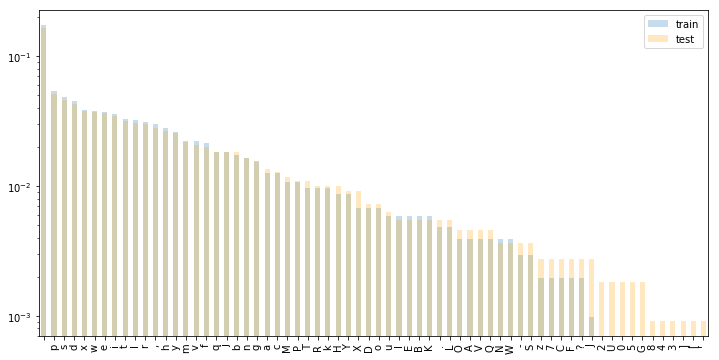

In [21]:
plt.figure(figsize=(12,6))
s_text1.value_counts(normalize=True).plot(kind='bar', log=True, alpha=0.25, label='train')
s_ciphertext1.value_counts(normalize=True).plot(kind='bar', log=True, color='orange', alpha=0.25, label='test')
plt.legend()

In [22]:
def stats(s):
    '''Print text statistics for different characters'''
    print('lower:', len([x for x in s if x.islower()]), end=' ')
    print('upper:', len([x for x in s if x.isupper()]), end=' ')
    print('digit:', len([x for x in s if x.isdigit()]), end=' ')
    print('space:', len([x for x in s if x == ' ']), end=' ')
    print(', -', len([x for x in s if x == ',']), end=' ')
    print('. -', len([x for x in s if x == '.']))
    print('GPLBIXTE:', len([x for x in s if x in 'GPLBIXTE']), end=' ')
    print('GPQOMDYW:', len([x for x in s if x in 'GPQOMDYW']), end=' ')
    print('U:', len([x for x in s if x in 'U']))

In [23]:
stats(text1)

lower: 667 upper: 139 digit: 0 space: 181 , - 31 . - 6
GPLBIXTE: 51 GPQOMDYW: 53 U: 2


In [24]:
stats(ciphertext1)

lower: 696 upper: 162 digit: 12 space: 183 , - 31 . - 6
GPLBIXTE: 60 GPQOMDYW: 59 U: 2


In [25]:
pd.Series([x for x in text1 if x.isupper()]).value_counts()

M    11
R    11
Y    10
P    10
T    10
X     9
D     7
H     7
L     6
K     6
E     6
O     5
A     5
Q     4
I     4
W     4
V     4
B     4
N     3
F     3
U     2
C     2
J     2
G     2
S     2
dtype: int64

In [26]:
pd.Series([x for x in ciphertext1 if x.isupper()]).value_counts()

M    13
P    12
T    12
H    11
R    11
Y    10
X    10
D     8
I     6
L     6
K     6
E     6
B     6
Q     5
A     5
V     5
O     5
N     4
W     4
S     4
C     3
F     3
J     3
U     2
G     2
dtype: int64

In [27]:
len(text1), len(ciphertext1)

(1029, 1100)

- facts: 
  - `.` (dot) and `,` (comma) - equal counts but different postitions in both text and ciphertext
  - ` ` (space) - only 2 more in ciphertext (by random generation)

In [28]:
dot_p = [pos for pos, char in enumerate(text1) if char == '.']
dot_c = [pos for pos, char in enumerate(ciphertext1) if char == '.']
dot_U = [pos for pos, char in enumerate(ciphertext1) if char == 'U']

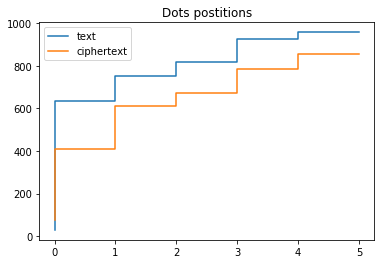

In [29]:
plt.title('Dots postitions')
plt.step(range(len(dot_p)), dot_p, label='text')
plt.step(range(len(dot_c)), dot_c, label='ciphertext')
plt.legend()

In [30]:
comma_p = [pos for pos, char in enumerate(text1) if char == ',']
comma_c = [pos for pos, char in enumerate(ciphertext1) if char == ',']

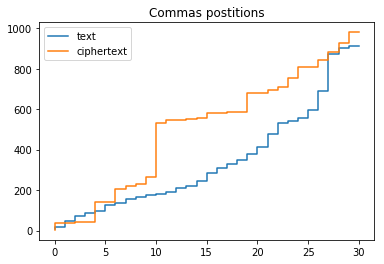

In [31]:
plt.title('Commas postitions')
plt.step(range(len(comma_p)), comma_p, label='text')
plt.step(range(len(comma_c)), comma_c, label='ciphertext')
plt.legend()

In [32]:
U_p = [pos for pos, char in enumerate(text1) if char == 'U']
U_c = [pos for pos, char in enumerate(ciphertext1) if char == 'U']

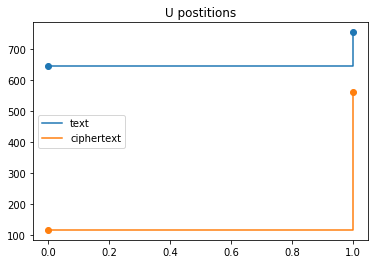

In [33]:
plt.title('U postitions')
plt.step(range(len(U_p)), U_p, where='post', label='text')
plt.plot(range(len(U_p)), U_p, 'C0o')
plt.step(range(len(U_c)), U_c, where='post', label='ciphertext')
plt.plot(range(len(U_c)), U_c, 'C1o')
plt.legend()

- hypotesis:
  - positions of `.` and `,` are changed
  - transposition cipher (i.e. columnar) nx10
  - key size candidates:
    - 5, 10, 20, 25, 50

In [34]:
ciphertext2_idx = df_test['ciphertext_len'].sort_values().index[-2]
ciphertext3_idx = df_test['ciphertext_len'].sort_values().index[-3]

In [35]:
ciphertext2 = df_test.loc[ciphertext2_idx, 'ciphertext']
ciphertext2

"tic  NT vFmq d lgEeHYQS br. MErgye  eTdDIPD,vt cJW6qy XfeXcS,CMrxvSdTUfShEYdqG D  KwreseE3Y  TJmmGCCy,Rxapi  6':jXHddKYDyI,arw ,w9FrqXGy  XEhY FtnQyfOotgDWt dM  MN qudhdfTyqY,fbiFEjQLhe lulv:jfC  asYTgPXi,ivjodwtd PyasIJpPQs wtaieflfvedt .MrLAsWoqb0$-BwpfCq, F  Reeee RHf6 si paY J , ki t$HLIidhshgq,Yg hobwlDVtenI i lxlXjPym tfK$N)g ssmkttSmYytcs ?DOir.s hqqlHiD qd mQDLIsoi,f  fY S,eeomLbFdcl ,D sY"

In [36]:
ciphertext3 = df_test.loc[ciphertext3_idx, 'ciphertext']
ciphertext3

"zBXswpDLeYhE(EPipxd mV. pk Tfw-awKE ead oE .bbsVFCuKePQhbm , B m yunLk YgJ.yrpbiJ LxsbeT85!Xn  y  pfTM ls  Gb,TzesH lVxhMDrfiEsKC3CW)bE,bP,wFEeh UmkY4QhSdBopC bS hm EiRMi0QtmFexDl Dke UF rBTb0dbSi Iry yihyRatPD'dm H lWshbm dtBgwgSmCdx d R  aeeyvEgt(XN8ftBdf soq etxQaqid,Y lLse lste ld ' KF$IffM x,omrks e.rsrq-il Ke dt  pye x rDi]9xfRdtirylidhvpsldGCErd crp  rfs kbi NNDu s s qausrtvmlp,bcUenvj r cv"

In [37]:
df_train[(df_train['text_len'] > 300) & (df_train['text_len'] <= 400)]

,plaintext_id,text,index,text0,text1,text2,text3,text_len
6938,ID_ad64b5b8d,"Enter, from one side, LUCIUS, IACHIMO, and th...",31474,"Tmfih, edsc nyi ihoi, BTNMKR, TERGTQE, yyh jg...","Dyxtq, qvel art rtht, KGGXTE, MPBSMCN, lrs ss...","Prjdd, jhnx sdd emsd, WYRHGW, XYNLXLA, edc fl...","Idspv, uqaq emp wxcp, PKBTYI, HLGWHXS, pmo xw...",301
14716,ID_aa725775f,Captain: Drums and trumpets sounded. Enter MAR...,96535,Rybxphy: Hhtxw pmo xhtxttse wetyhtc. Prjdd QPQ...,Bltjytr: Sqgqi yyh jqgqfdfw ingrsdo. Idspv CYD...,Nefslmd: Cdycr lrs sdycopxi raydcph. Tmfih LLV...,Gpofexm: Ovkle edc fvklbijr eskmois. Dyxtq XEH...,345
61720,ID_8d530a8a2,During this song they pinch FALSTAFF. DOCTOR C...,66850,Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH B...,Cgvxmr xwhe wemr xwdk txmnl UYWWJYQJ. SNNXEQ N...,Oyhhyk jgtw inyk jgpd fhygw ELPISLJU. CAGJND G...,Hkqtrv ssmi rarv ssio otrrg QEBRFEUE. OSRSAV R...,304


In [38]:
text2_idx = 14716
text2 = df_train.loc[text2_idx, 'text1']
text2

'Bltjytr: Sqgqi yyh jqgqfdfw ingrsdo. Idspv CYDXXTE edc  XYJHGW, Pefih ssic, sis Cdy ftydmdf l geeqmd  baatqph mhfl qklga, ssid KGGXTE edc CYXMFYI. Yqxtq  fltl, FMJTE EDCDSDHNYI, yyh jgpr JYXSHY, imjg  LPPQMYI, CPQTSDMKR, NLXQAR, PYDSD, yyh essih Faxwr,  bvxrartqe, Wekomtqe edc bieowi unwpevtrv. Ssi Qdlvtqe wts osmm flt bajuhy, edc FMJTE wfdloi'

In [39]:
text3_idx = 61720
text3 = df_train.loc[text3_idx, 'text0']
text3

"Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH BLMKR  nscde sdd ieo, yyh ispebr lbpx l fex tr vqpid,  RWIDCPV pmaxwdd bpx, lrs slotr aju y mso hy bwhfi,  pmo JTMFSD baqtr lrs rfipke emyk EDM BEVD.  L rehei ee sydstrv he ltydh mhflxm. Lpb ssi  Uytvxde vkm lbpx. QEBRFEUE bybke sue smi agga'r sipc, lrs qtwtr"

In [40]:
s_text123 = pd.Series([y for x in [text1, text2, text3] for y in list(x)])
s_ciphertext123 = pd.Series([y for x in [ciphertext1, ciphertext2, ciphertext3] for y in list(x)])

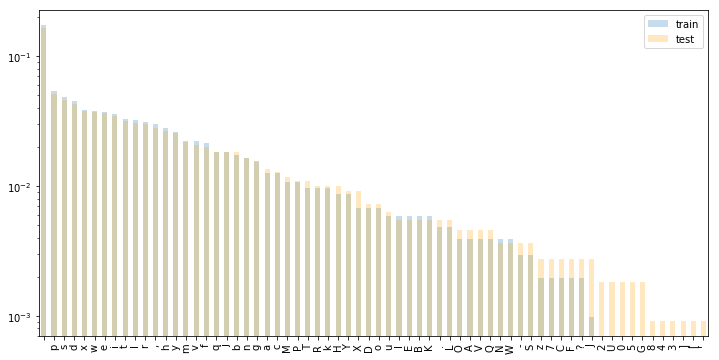

In [41]:
plt.figure(figsize=(12,6))
s_text1.value_counts(normalize=True).plot(kind='bar', log=True, alpha=0.25, label='train')
s_ciphertext1.value_counts(normalize=True).plot(kind='bar', log=True, color='orange', alpha=0.25, label='test')
plt.legend()

In [42]:
stats(text2)

lower: 183 upper: 89 digit: 0 space: 56 , - 13 . - 3
GPLBIXTE: 32 GPQOMDYW: 36 U: 0


In [43]:
stats(ciphertext2)

lower: 199 upper: 114 digit: 6 space: 56 , - 13 . - 3
GPLBIXTE: 39 GPQOMDYW: 45 U: 1


- text2 and ciphertext2 has same count of ` `, `,` and `.`

In [44]:
stats(text3)

lower: 183 upper: 51 digit: 0 space: 60 , - 5 . - 4
GPLBIXTE: 21 GPQOMDYW: 13 U: 2


In [45]:
stats(ciphertext3)

lower: 216 upper: 94 digit: 8 space: 61 , - 7 . - 4
GPLBIXTE: 36 GPQOMDYW: 27 U: 3


- text3 and ciphertext3 has same count of `.` and almost the same `,` and ` `
- ciphertext3 has 8 digits, but text3 has 0 digits!
  - all digits in ciphertext3 are from left|right paddings

## Reshaping ciphertext and UPPERCASE patterns detection

In [46]:
text3

"Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH BLMKR  nscde sdd ieo, yyh ispebr lbpx l fex tr vqpid,  RWIDCPV pmaxwdd bpx, lrs slotr aju y mso hy bwhfi,  pmo JTMFSD baqtr lrs rfipke emyk EDM BEVD.  L rehei ee sydstrv he ltydh mhflxm. Lpb ssi  Uytvxde vkm lbpx. QEBRFEUE bybke sue smi agga'r sipc, lrs qtwtr"

In [47]:
def size(text, other_side):
    '''Detecting size of rectangle to fit text, using given other side'''
    return (len(text) - 1) // other_side + 1

In [48]:
def reshape(text, n_rows=None, n_cols=50, pattern=None, wide=True, verbose=False):
    '''Reshape text into rectangle by rows or columns with output'''
    if verbose:
        print(text, '\n')
    if n_rows is not None:
        if verbose:
            row_size = size(text, n_rows)
            for i in range(n_rows):
                row = text[i*row_size:(i+1)*row_size]
                if wide:
                    print(' '.join(list(row)))        
                else:
                    print(row)
        return text
    res = ''
    n_rows = size(text, n_cols)
    for i in range(n_rows):
        row = text[i::n_rows]
        res += row
        if verbose:
            if wide:
                print(' '.join(list(row)))
            else:
                print(row)
    if pattern is not None:
        if pattern in res:
            print(pattern, '->->->', n_cols)
        if pattern[::-1] in res:
            print(pattern, '<-<-<-', n_cols)
    return res

In [49]:
# np.array(list(ciphertext3)).reshape(20, -1).T

In [50]:
def find_pattern(cipertext, patterns):
    '''Find given patterns in ciphertext in direct or backward direction for different key size'''
    for key_size in [5, 10, 20, 25, 50, 100]:
        print('----- key_size -----', key_size)
        for pattern in patterns:
            reshape(cipertext, n_cols=key_size, pattern=pattern)

In [51]:
find_pattern(ciphertext3, ['BEVD', 'RWIDCPV', 'JTMFSD', 'BLMKR'])

----- key_size ----- 5
----- key_size ----- 10
----- key_size ----- 20
RWIDCPV <-<-<- 20
JTMFSD ->->-> 20
BLMKR ->->-> 20
----- key_size ----- 25
----- key_size ----- 50
----- key_size ----- 100


In [52]:
text3

"Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH BLMKR  nscde sdd ieo, yyh ispebr lbpx l fex tr vqpid,  RWIDCPV pmaxwdd bpx, lrs slotr aju y mso hy bwhfi,  pmo JTMFSD baqtr lrs rfipke emyk EDM BEVD.  L rehei ee sydstrv he ltydh mhflxm. Lpb ssi  Uytvxde vkm lbpx. QEBRFEUE bybke sue smi agga'r sipc, lrs qtwtr"

In [53]:
reshape(ciphertext3, n_cols=20, verbose=True)

zBXswpDLeYhE(EPipxd mV. pk Tfw-awKE ead oE .bbsVFCuKePQhbm , B m yunLk YgJ.yrpbiJ LxsbeT85!Xn  y  pfTM ls  Gb,TzesH lVxhMDrfiEsKC3CW)bE,bP,wFEeh UmkY4QhSdBopC bS hm EiRMi0QtmFexDl Dke UF rBTb0dbSi Iry yihyRatPD'dm H lWshbm dtBgwgSmCdx d R  aeeyvEgt(XN8ftBdf soq etxQaqid,Y lLse lste ld ' KF$IffM x,omrks e.rsrq-il Ke dt  pye x rDi]9xfRdtirylidhvpsldGCErd crp  rfs kbi NNDu s s qausrtvmlp,bcUenvj r cv 

z m o   J T M F S D   b a q t r   l r s
B V E B   M D E   k y m e   e k p i f r
X .     L   r e h e i   e e   s y d s t
s   . m x l f h m   h d y t l   e h   v
w p b   s s i     U y t v x d e   v k m
p k b y b   E U E F R B E Q   . x p b l
D   s u e   s m i   a g g a ' r   s i p
L T V n T G K k R r t w t q   s r l   ,
e f F L 8 b C Y M B P g ( i K r D d N b
Y w C k 5 , 3 4 i T D S X d F q i G N c
h - u   ! T C Q 0 b ' m N , $ - ] C D U
E a K Y X z W h Q 0 d C 8 Y I i 9 E u e
( w e g n e ) S t d m d f   f l x r   n
E K P J   s b d m b   x t l f   f d s v
P E Q .   H E B F S H   B L M K R    

"zmo JTMFSD baqtr lrsBVEB MDE kyme ekpifrX.  L rehei ee sydsts .mxlfhm hdytl eh vwpb ssi  Uytvxde vkmpkbyb EUEFRBEQ .xpblD sue smi agga'r sipLTVnTGKkRrtwtq srl ,efFL8bCYMBPg(iKrDdNbYwCk5,34iTDSXdFqiGNch-u !TCQ0b'mN,$-]CDUEaKYXzWhQ0dC8YIi9Eue(wegne)Stdmdf flxr nEKPJ sbdmb xtlf fdsvPEQ. HEBFSH BLMKR  ji hyy ,oei dds edcs pebr lbpx l fex tr rxamp VPCDIWR  ,dipq dd bpx, lrs slotr ac  ,ifhwb yh osm y uv"

In [54]:
reshape(ciphertext3, n_rows=20, verbose=True)

zBXswpDLeYhE(EPipxd mV. pk Tfw-awKE ead oE .bbsVFCuKePQhbm , B m yunLk YgJ.yrpbiJ LxsbeT85!Xn  y  pfTM ls  Gb,TzesH lVxhMDrfiEsKC3CW)bE,bP,wFEeh UmkY4QhSdBopC bS hm EiRMi0QtmFexDl Dke UF rBTb0dbSi Iry yihyRatPD'dm H lWshbm dtBgwgSmCdx d R  aeeyvEgt(XN8ftBdf soq etxQaqid,Y lLse lste ld ' KF$IffM x,omrks e.rsrq-il Ke dt  pye x rDi]9xfRdtirylidhvpsldGCErd crp  rfs kbi NNDu s s qausrtvmlp,bcUenvj r cv 

z B X s w p D L e Y h E ( E P i p x d  
m V .   p k   T f w - a w K E   e a d  
o E   . b b s V F C u K e P Q h b m   ,
  B   m   y u n L k   Y g J . y r p b i
J   L x s b e T 8 5 ! X n     y     p f
T M   l s     G b , T z e s H   l V x h
M D r f i E s K C 3 C W ) b E , b P , w
F E e h   U m k Y 4 Q h S d B o p C   b
S   h m   E i R M i 0 Q t m F e x D l  
D k e   U F   r B T b 0 d b S i   I r y
  y i h y R a t P D ' d m   H   l W s h
b m   d t B g w g S m C d x   d   R    
a e e y v E g t ( X N 8 f t B d f   s o
q   e t x Q a q i d , Y   l L s e   l s
t e   l d   '   K F $ I f f M   x , o

"zBXswpDLeYhE(EPipxd mV. pk Tfw-awKE ead oE .bbsVFCuKePQhbm , B m yunLk YgJ.yrpbiJ LxsbeT85!Xn  y  pfTM ls  Gb,TzesH lVxhMDrfiEsKC3CW)bE,bP,wFEeh UmkY4QhSdBopC bS hm EiRMi0QtmFexDl Dke UF rBTb0dbSi Iry yihyRatPD'dm H lWshbm dtBgwgSmCdx d R  aeeyvEgt(XN8ftBdf soq etxQaqid,Y lLse lste ld ' KF$IffM x,omrks e.rsrq-il Ke dt  pye x rDi]9xfRdtirylidhvpsldGCErd crp  rfs kbi NNDu s s qausrtvmlp,bcUenvj r cv"

In [55]:
text3

"Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH BLMKR  nscde sdd ieo, yyh ispebr lbpx l fex tr vqpid,  RWIDCPV pmaxwdd bpx, lrs slotr aju y mso hy bwhfi,  pmo JTMFSD baqtr lrs rfipke emyk EDM BEVD.  L rehei ee sydstrv he ltydh mhflxm. Lpb ssi  Uytvxde vkm lbpx. QEBRFEUE bybke sue smi agga'r sipc, lrs qtwtr"

- column key_size=20
- there are names uppercase letters 
  - forward direction (`BLMKR`, `JTMFSD`)
  - backward direction (`RWIDCPV`)
- hypotesis: route cipher
- last column not matching

In [57]:
def shift_row(row_idx, text, n_cols, shift):
    row = text[row_idx*n_cols:(row_idx+1)*n_cols]
    return row[shift:] + row[:shift]

In [58]:
def decrypt(ciphertext, n_cols=20, verbose=False):
    '''First version'''
    #1. extract head and tail rows
    d = n_cols//2
    head, tail = ciphertext[:d], ciphertext[-d:]
    if verbose:
        print('head:', head, 'tail:', tail)
    #2. swap right and left cols
    ciphertext_ = ''
    n_rows = size(ciphertext, n_cols)
    for i in range(n_rows):
        ciphertext_ += shift_row(i, ciphertext, n_cols, d)
    ciphertext = ciphertext_
    #3. extracting cols
    cols = []
    for i in range(n_cols):
        col = ciphertext[i::n_cols]
        if i < d:
            col = col[:-1]  
        else:
            col = col[1:]
        if i % 2 == 0:
            col = head[i//2] + col
        else:
            col = tail[i//2] + col[::-1]
        if verbose:
            print('i:', i, 'col:', col)
        cols += col
    return ''.join(cols)

In [59]:
text3d = decrypt(ciphertext3, verbose=True)

head: zBXswpDLeY tail: Uenvj r cv
i: 0 col: zh-u !TCQ0b'mN,$-]CD
i: 1 col: UuE9iIY8Cd0QhWzXYKaE
i: 2 col: B(wegne)Stdmdf flxr 
i: 3 col: esdf fltx bmdbs JPKE
i: 4 col: XPEQ. HEBFSH BLMKR  
i: 5 col: nscde sdd ieo, yyh i
i: 6 col: spebr lbpx l fex tr 
i: 7 col: vqpid,  RWIDCPV pmax
i: 8 col: wdd bpx, lrs slotr a
i: 9 col: ju y mso hy bwhfi,  
i: 10 col: pmo JTMFSD baqtr lrs
i: 11 col:  rfipke emyk EDM BEV
i: 12 col: D.  L rehei ee sydst
i: 13 col: rv he ltydh mhflxm. 
i: 14 col: Lpb ssi  Uytvxde vkm
i: 15 col:  lbpx. QEBRFEUE bybk
i: 16 col: e sue smi agga'r sip
i: 17 col: c, lrs qtwtrRkKGTnVT
i: 18 col: YfFL8bCYMBPg(iKrDdNb
i: 19 col: vcNGiqFdXSDTi43,5kCw


In [60]:
text3

"Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH BLMKR  nscde sdd ieo, yyh ispebr lbpx l fex tr vqpid,  RWIDCPV pmaxwdd bpx, lrs slotr aju y mso hy bwhfi,  pmo JTMFSD baqtr lrs rfipke emyk EDM BEVD.  L rehei ee sydstrv he ltydh mhflxm. Lpb ssi  Uytvxde vkm lbpx. QEBRFEUE bybke sue smi agga'r sipc, lrs qtwtr"

In [61]:
text3d

"zh-u !TCQ0b'mN,$-]CDUuE9iIY8Cd0QhWzXYKaEB(wegne)Stdmdf flxr esdf fltx bmdbs JPKEXPEQ. HEBFSH BLMKR  nscde sdd ieo, yyh ispebr lbpx l fex tr vqpid,  RWIDCPV pmaxwdd bpx, lrs slotr aju y mso hy bwhfi,  pmo JTMFSD baqtr lrs rfipke emyk EDM BEVD.  L rehei ee sydstrv he ltydh mhflxm. Lpb ssi  Uytvxde vkm lbpx. QEBRFEUE bybke sue smi agga'r sipc, lrs qtwtrRkKGTnVTYfFL8bCYMBPg(iKrDdNbvcNGiqFdXSDTi43,5kCw"

In [62]:
text3 in text3d

True

In [63]:
ciphertext3[:10], ciphertext3[-10:]

('zBXswpDLeY', 'Uenvj r cv')

In [64]:
reshape(ciphertext3[10:-10], n_rows=19, verbose=True)

hE(EPipxd mV. pk Tfw-awKE ead oE .bbsVFCuKePQhbm , B m yunLk YgJ.yrpbiJ LxsbeT85!Xn  y  pfTM ls  Gb,TzesH lVxhMDrfiEsKC3CW)bE,bP,wFEeh UmkY4QhSdBopC bS hm EiRMi0QtmFexDl Dke UF rBTb0dbSi Iry yihyRatPD'dm H lWshbm dtBgwgSmCdx d R  aeeyvEgt(XN8ftBdf soq etxQaqid,Y lLse lste ld ' KF$IffM x,omrks e.rsrq-il Ke dt  pye x rDi]9xfRdtirylidhvpsldGCErd crp  rfs kbi NNDu s s qausrtvmlp,bc 

h E ( E P i p x d   m V .   p k   T f w
- a w K E   e a d   o E   . b b s V F C
u K e P Q h b m   ,   B   m   y u n L k
  Y g J . y r p b i J   L x s b e T 8 5
! X n     y     p f T M   l s     G b ,
T z e s H   l V x h M D r f i E s K C 3
C W ) b E , b P , w F E e h   U m k Y 4
Q h S d B o p C   b S   h m   E i R M i
0 Q t m F e x D l   D k e   U F   r B T
b 0 d b S i   I r y   y i h y R a t P D
' d m   H   l W s h b m   d t B g w g S
m C d x   d   R     a e e y v E g t ( X
N 8 f t B d f   s o q   e t x Q a q i d
, Y   l L s e   l s t e   l d   '   K F
$ I f f M   x , o m r k s   e . r s r q
- i l   K e   d t

"hE(EPipxd mV. pk Tfw-awKE ead oE .bbsVFCuKePQhbm , B m yunLk YgJ.yrpbiJ LxsbeT85!Xn  y  pfTM ls  Gb,TzesH lVxhMDrfiEsKC3CW)bE,bP,wFEeh UmkY4QhSdBopC bS hm EiRMi0QtmFexDl Dke UF rBTb0dbSi Iry yihyRatPD'dm H lWshbm dtBgwgSmCdx d R  aeeyvEgt(XN8ftBdf soq etxQaqid,Y lLse lste ld ' KF$IffM x,omrks e.rsrq-il Ke dt  pye x rDi]9xfRdtirylidhvpsldGCErd crp  rfs kbi NNDu s s qausrtvmlp,bc"

In [65]:
def decrypt(ciphertext, n_cols=20, verbose=False):
    '''Simplified version'''
    #1. extract head and tail rows
    n_rows = size(ciphertext, n_cols)
    d = n_rows//2 
    s, f = (d, d) if n_rows % 2 == 0 else (d + 1, d)
    head, tail, ciphertext = ciphertext[:s], ciphertext[-f:], ciphertext[s:-f]
    if verbose:
        print('head:', head, 'tail:', tail)
    #2. extracting rows
    chars = []
    for i in range(n_rows):
        row = ciphertext[i::n_rows]
        if i % 2 == 0:
            row = head[i//2] + row
        else:
            row = tail[i//2] + row[::-1]
        if verbose:
            print(f'i: {i:2}', 'row:', row)
        chars += row
    return ''.join(chars)

In [66]:
text3d = decrypt(ciphertext3, verbose=True)

head: zBXswpDLeY tail: Uenvj r cv
i:  0 row: zh-u !TCQ0b'mN,$-]CD
i:  1 row: UuE9iIY8Cd0QhWzXYKaE
i:  2 row: B(wegne)Stdmdf flxr 
i:  3 row: esdf fltx bmdbs JPKE
i:  4 row: XPEQ. HEBFSH BLMKR  
i:  5 row: nscde sdd ieo, yyh i
i:  6 row: spebr lbpx l fex tr 
i:  7 row: vqpid,  RWIDCPV pmax
i:  8 row: wdd bpx, lrs slotr a
i:  9 row: ju y mso hy bwhfi,  
i: 10 row: pmo JTMFSD baqtr lrs
i: 11 row:  rfipke emyk EDM BEV
i: 12 row: D.  L rehei ee sydst
i: 13 row: rv he ltydh mhflxm. 
i: 14 row: Lpb ssi  Uytvxde vkm
i: 15 row:  lbpx. QEBRFEUE bybk
i: 16 row: e sue smi agga'r sip
i: 17 row: c, lrs qtwtrRkKGTnVT
i: 18 row: YfFL8bCYMBPg(iKrDdNb
i: 19 row: vcNGiqFdXSDTi43,5kCw


In [67]:
text3 in text3d

True

In [68]:
def encrypt(text, n_cols=20, verbose=False):
    #1. constructing cols, head and tail
    n_rows = size(text, n_cols)
    head, tail = text[::n_cols*2], text[n_cols::n_cols*2]
    if verbose:
        print('head:', head, 'tail:', tail)
    cols = []
    for i in range(n_rows):
        col = text[i*n_cols:(i+1)*n_cols]
        if i % 2 == 0:
            col = col[1:]
        else:
            col = col[1:][::-1]
        if verbose:
            print(f'i: {i:2}', 'col:', col)
        cols += [col]
    #2. convert cols to rows
    ciphertext = ''
    for i in range(n_cols-1):
        ciphertext += ''.join([col[i] for col in cols])
    #3. add head and tail
    return head + ciphertext + tail

In [69]:
ciphertext3e = encrypt(text3d, 20, verbose=True)

head: zBXswpDLeY tail: Uenvj r cv
i:  0 col: h-u !TCQ0b'mN,$-]CD
i:  1 col: EaKYXzWhQ0dC8YIi9Eu
i:  2 col: (wegne)Stdmdf flxr 
i:  3 col: EKPJ sbdmb xtlf fds
i:  4 col: PEQ. HEBFSH BLMKR  
i:  5 col: i hyy ,oei dds edcs
i:  6 col: pebr lbpx l fex tr 
i:  7 col: xamp VPCDIWR  ,dipq
i:  8 col: dd bpx, lrs slotr a
i:  9 col:   ,ifhwb yh osm y u
i: 10 col: mo JTMFSD baqtr lrs
i: 11 col: VEB MDE kyme ekpifr
i: 12 col: .  L rehei ee sydst
i: 13 col:  .mxlfhm hdytl eh v
i: 14 col: pb ssi  Uytvxde vkm
i: 15 col: kbyb EUEFRBEQ .xpbl
i: 16 col:  sue smi agga'r sip
i: 17 col: TVnTGKkRrtwtq srl ,
i: 18 col: fFL8bCYMBPg(iKrDdNb
i: 19 col: wCk5,34iTDSXdFqiGNc


In [70]:
ciphertext3e == ciphertext3

True

In [71]:
text2

'Bltjytr: Sqgqi yyh jqgqfdfw ingrsdo. Idspv CYDXXTE edc  XYJHGW, Pefih ssic, sis Cdy ftydmdf l geeqmd  baatqph mhfl qklga, ssid KGGXTE edc CYXMFYI. Yqxtq  fltl, FMJTE EDCDSDHNYI, yyh jgpr JYXSHY, imjg  LPPQMYI, CPQTSDMKR, NLXQAR, PYDSD, yyh essih Faxwr,  bvxrartqe, Wekomtqe edc bieowi unwpevtrv. Ssi Qdlvtqe wts osmm flt bajuhy, edc FMJTE wfdloi'

In [72]:
find_pattern(ciphertext2, ['NLXQAR', 'JYXSHY', 'PYDSD', 'XYJHGW'])

----- key_size ----- 5
----- key_size ----- 10
----- key_size ----- 20
NLXQAR ->->-> 20
JYXSHY ->->-> 20
XYJHGW ->->-> 20
----- key_size ----- 25
----- key_size ----- 50
----- key_size ----- 100


In [73]:
text2d = decrypt(ciphertext2, 20, verbose=True)

head: tic  NT vF tail: Fdcl ,D sY
i:  0 row: tmr6fY'FoT:wf-fLtNOL
i:  1 row: FIi)eI6Bltjytr: Sqgq
i:  2 row: i yyh jqgqfdfw ingrs
i:  3 row: do. Idspv CYDXXTE ed
i:  4 row: c  XYJHGW, Pefih ssi
i:  5 row: c, sis Cdy ftydmdf l
i:  6 row:  geeqmd  baatqph mhf
i:  7 row: l qklga, ssid KGGXTE
i:  8 row:  edc CYXMFYI. Yqxtq 
i:  9 row:  fltl, FMJTE EDCDSDH
i: 10 row: NYI, yyh jgpr JYXSHY
i: 11 row: , imjg  LPPQMYI, CPQ
i: 12 row: TSDMKR, NLXQAR, PYDS
i: 13 row: D, yyh essih Faxwr, 
i: 14 row:  bvxrartqe, Wekomtqe
i: 15 row:  edc bieowi unwpevtr
i: 16 row: v. Ssi Qdlvtqe wts o
i: 17 row: smm flt bajuhy, edc 
i: 18 row: FMJTE wfdloi0R$DK?QL
i: 19 row: YbDD$VHH$edvfO963UWE


In [74]:
text2

'Bltjytr: Sqgqi yyh jqgqfdfw ingrsdo. Idspv CYDXXTE edc  XYJHGW, Pefih ssic, sis Cdy ftydmdf l geeqmd  baatqph mhfl qklga, ssid KGGXTE edc CYXMFYI. Yqxtq  fltl, FMJTE EDCDSDHNYI, yyh jgpr JYXSHY, imjg  LPPQMYI, CPQTSDMKR, NLXQAR, PYDSD, yyh essih Faxwr,  bvxrartqe, Wekomtqe edc bieowi unwpevtrv. Ssi Qdlvtqe wts osmm flt bajuhy, edc FMJTE wfdloi'

In [75]:
text2 in text2d

True

In [76]:
text1

"Xhtxttse, wtmyij, yyh rndrtse. Idspv jva Atqrihr,  imjg eleqf wxkhih vlrsr, yins fltl, fbe Rnvxapw, xm  flt glfxs aj snnxeqe, euspv jgpq, RYYXTQMYHX lpemp,  euspv whx, PXMNSBM, Ppo, Qagwdextq, lrs Rlmds  Lwpos, rtwf xwdx, bxss welp wcywp shexpmni, unwpeve  e Vdyxbdxed apehhyk jgp tkqei, mhfl jgp khdlx idlp,  pmo e rydhxmlp'i glx, jgpr jva Thhpwjr, mipqtrv  dlgw y embupv rqawi, ssid y Ridswicyy-yigpv  qydi-wdlhtc, lgrnxtpmtis vtxw y Eihfpeds-lx-pqxw  qdlvxmr e ihwatq xerd, fltm fbe Fprjkpqtm mipqtrv  sis vqpej rtpldd txkwehr, ljjdd xwdx, wxcp fo rtht,  BLVSHYEB VAPIDK edc NEHCTRPK NECOPMKR, fbe Mafbdxid  vtxw ssi ivavs yyh cyni. AHYK WDYVO UTMX slotr  bppbp ydcpv jgp gbnfl ee expsp, GPQOMDYW BEKEIO yyh  RYDHXMLP RYXTTHGW ihf ydcpv whx ei ighvde. UKDPR  AYFLPQTRT slotr bppbp welp hxrfedbp jhnx OXMR  LTMDD LHTM. Jgp Fxrssfr bppbp xwdxwtkhii ny ipbs  wxcp xwd nskqf, md llrddd su y nsdrtwjndd, qdwsm  ssic, ssi Ibdmqde. Xwd Wshce wxs yins flt Atwwnbw.  Jgp vtrf su ssi Psfidclrjr expmo md ba

In [77]:
find_pattern(ciphertext1, ['LHTM', 'UKDPR', 'VAPIDK'])

----- key_size ----- 5
----- key_size ----- 10
----- key_size ----- 20
LHTM ->->-> 20
UKDPR <-<-<- 20
VAPIDK ->->-> 20
----- key_size ----- 25
----- key_size ----- 50
----- key_size ----- 100


In [78]:
reshape(ciphertext1, n_rows=20, verbose=True)

lti, xwiii yl wBdOxTLMksevm7qtsrhl ,eh,Lpn,e,' yeqd-xeFkeE bxV epTHFPXRth ud. ttfB75xeqrtfeuw  om q pg m is-bpxhYVfiYU sXGYQO wid q prm  B t,t,lbqs P spukmllwb -dpfrtrHAadDTepYWAT  xidymXgfysHuCh A feepvXs,xnthmxguvweq j ,SPM WMe,R  RxLd d dwJ dhNMwXw    xvpMd ew fx,lppdpxmkd VI   X   i TnTwnrnbd slczS7staisRn sNmrhpplh dvglfwtpdlLDevK lGPhR hMxylsI  urp08IamvmnnnjuSltseg dj  ihh lqljBKbtYsfPLfPsjD  ld W. avIHMwyjjivsgeBRw vjjyg ryti ftpj  fxHlnQM Dl Dpi riswsb P0wSi gyx p M fpe grpvq-cEq mtd e wAobOXyKop bpdtshbs pa3kzjv  ajq ,s w kp rray, d, rd,d,  tgMHdUtbLpbmwscnidaHbDT,pe,pa,, rxy y e twy yldm  tcRs.r DDc rdHps j ew maxgec slrw  pPlwcehk jqicl vrijxh Ksi pYYp. eTb ,n, wP yH?Tkydes,sRmp dw hhovp,igwxepewtNMin gWRvebfM  fdcwtsojw[j?yIqr xYeo,x Vedmai wrxmxqpdrEP ybj   dpr.rwqdixAfm 4tVXh flxfYp,q,pdplp mssntr tqx HOicp B wvpx fxk,ss ipsm2rz . vmlXl t lyax T sdxv qrv,oCCv pvEhhhbhJscs s tdxs]25xrew  gT Qxbex   h,iit etv  fTEahbpKyxgp gspnq ylceitJQPnsxh  QXaexwbdi,hrdRps a sw RNvypcE

"lti, xwiii yl wBdOxTLMksevm7qtsrhl ,eh,Lpn,e,' yeqd-xeFkeE bxV epTHFPXRth ud. ttfB75xeqrtfeuw  om q pg m is-bpxhYVfiYU sXGYQO wid q prm  B t,t,lbqs P spukmllwb -dpfrtrHAadDTepYWAT  xidymXgfysHuCh A feepvXs,xnthmxguvweq j ,SPM WMe,R  RxLd d dwJ dhNMwXw    xvpMd ew fx,lppdpxmkd VI   X   i TnTwnrnbd slczS7staisRn sNmrhpplh dvglfwtpdlLDevK lGPhR hMxylsI  urp08IamvmnnnjuSltseg dj  ihh lqljBKbtYsfPLfPsjD  ld W. avIHMwyjjivsgeBRw vjjyg ryti ftpj  fxHlnQM Dl Dpi riswsb P0wSi gyx p M fpe grpvq-cEq mtd e wAobOXyKop bpdtshbs pa3kzjv  ajq ,s w kp rray, d, rd,d,  tgMHdUtbLpbmwscnidaHbDT,pe,pa,, rxy y e twy yldm  tcRs.r DDc rdHps j ew maxgec slrw  pPlwcehk jqicl vrijxh Ksi pYYp. eTb ,n, wP yH?Tkydes,sRmp dw hhovp,igwxepewtNMin gWRvebfM  fdcwtsojw[j?yIqr xYeo,x Vedmai wrxmxqpdrEP ybj   dpr.rwqdixAfm 4tVXh flxfYp,q,pdplp mssntr tqx HOicp B wvpx fxk,ss ipsm2rz . vmlXl t lyax T sdxv qrv,oCCv pvEhhhbhJscs s tdxs]25xrew  gT Qxbex   h,iit etv  fTEahbpKyxgp gspnq ylceitJQPnsxh  QXaexwbdi,hrdRps a sw RNvypc

In [79]:
reshape(ciphertext1[28:-27], n_rows=19, verbose=True)

qtsrhl ,eh,Lpn,e,' yeqd-xeFkeE bxV epTHFPXRth ud. ttfB75xeqrtfeuw  om q pg m is-bpxhYVfiYU sXGYQO wid q prm  B t,t,lbqs P spukmllwb -dpfrtrHAadDTepYWAT  xidymXgfysHuCh A feepvXs,xnthmxguvweq j ,SPM WMe,R  RxLd d dwJ dhNMwXw    xvpMd ew fx,lppdpxmkd VI   X   i TnTwnrnbd slczS7staisRn sNmrhpplh dvglfwtpdlLDevK lGPhR hMxylsI  urp08IamvmnnnjuSltseg dj  ihh lqljBKbtYsfPLfPsjD  ld W. avIHMwyjjivsgeBRw vjjyg ryti ftpj  fxHlnQM Dl Dpi riswsb P0wSi gyx p M fpe grpvq-cEq mtd e wAobOXyKop bpdtshbs pa3kzjv  ajq ,s w kp rray, d, rd,d,  tgMHdUtbLpbmwscnidaHbDT,pe,pa,, rxy y e twy yldm  tcRs.r DDc rdHps j ew maxgec slrw  pPlwcehk jqicl vrijxh Ksi pYYp. eTb ,n, wP yH?Tkydes,sRmp dw hhovp,igwxepewtNMin gWRvebfM  fdcwtsojw[j?yIqr xYeo,x Vedmai wrxmxqpdrEP ybj   dpr.rwqdixAfm 4tVXh flxfYp,q,pdplp mssntr tqx HOicp B wvpx fxk,ss ipsm2rz . vmlXl t lyax T sdxv qrv,oCCv pvEhhhbhJscs s tdxs]25xrew  gT Qxbex   h,iit etv  fTEahbpKyxgp gspnq ylceitJQPnsxh  QXaexwbdi,hrdRps a sw RNvypcEy i ppr  d ifl  kqyndtkiftMH

"qtsrhl ,eh,Lpn,e,' yeqd-xeFkeE bxV epTHFPXRth ud. ttfB75xeqrtfeuw  om q pg m is-bpxhYVfiYU sXGYQO wid q prm  B t,t,lbqs P spukmllwb -dpfrtrHAadDTepYWAT  xidymXgfysHuCh A feepvXs,xnthmxguvweq j ,SPM WMe,R  RxLd d dwJ dhNMwXw    xvpMd ew fx,lppdpxmkd VI   X   i TnTwnrnbd slczS7staisRn sNmrhpplh dvglfwtpdlLDevK lGPhR hMxylsI  urp08IamvmnnnjuSltseg dj  ihh lqljBKbtYsfPLfPsjD  ld W. avIHMwyjjivsgeBRw vjjyg ryti ftpj  fxHlnQM Dl Dpi riswsb P0wSi gyx p M fpe grpvq-cEq mtd e wAobOXyKop bpdtshbs pa3kzjv  ajq ,s w kp rray, d, rd,d,  tgMHdUtbLpbmwscnidaHbDT,pe,pa,, rxy y e twy yldm  tcRs.r DDc rdHps j ew maxgec slrw  pPlwcehk jqicl vrijxh Ksi pYYp. eTb ,n, wP yH?Tkydes,sRmp dw hhovp,igwxepewtNMin gWRvebfM  fdcwtsojw[j?yIqr xYeo,x Vedmai wrxmxqpdrEP ybj   dpr.rwqdixAfm 4tVXh flxfYp,q,pdplp mssntr tqx HOicp B wvpx fxk,ss ipsm2rz . vmlXl t lyax T sdxv qrv,oCCv pvEhhhbhJscs s tdxs]25xrew  gT Qxbex   h,iit etv  fTEahbpKyxgp gspnq ylceitJQPnsxh  QXaexwbdi,hrdRps a sw RNvypcEy i ppr  d ifl  kqyndtkiftM

In [80]:
text1d = decrypt(ciphertext1, verbose=True)

head: lti, xwiii yl wBdOxTLMksevm7 tail: ?rhlYwsxlwythscK yOieFwssjs
i:  0 row: lq5 Cw7IMwkDeTjVr5Qy
i:  1 row: ?nPxzX?kcTzSwasXhtxt
i:  2 row: tse, wtmyij, yyh rnd
i:  3 row: rtse. Idspv jva Atqr
i:  4 row: ihr,  imjg eleqf wxk
i:  5 row: hih vlrsr, yins fltl
i:  6 row: , fbe Rnvxapw, xm  f
i:  7 row: lt glfxs aj snnxeqe,
i:  8 row:  euspv jgpq, RYYXTQM
i:  9 row: YHX lpemp,  euspv wh
i: 10 row: x, PXMNSBM, Ppo, Qag
i: 11 row: wdextq, lrs Rlmds  L
i: 12 row: wpos, rtwf xwdx, bxs
i: 13 row: s welp wcywp shexpmn
i: 14 row: i, unwpeve  e Vdyxbd
i: 15 row: xed apehhyk jgp tkqe
i: 16 row: i, mhfl jgp khdlx id
i: 17 row: lp,  pmo e rydhxmlp'
i: 18 row: i glx, jgpr jva Thhp
i: 19 row: wjr, mipqtrv  dlgw y
i: 20 row:  embupv rqawi, ssid 
i: 21 row: y Ridswicyy-yigpv  q
i: 22 row: ydi-wdlhtc, lgrnxtpm
i: 23 row: tis vtxw y Eihfpeds-
i: 24 row: lx-pqxw  qdlvxmr e i
i: 25 row: hwatq xerd, fltm fbe
i: 26 row:  Fprjkpqtm mipqtrv  
i: 27 row: sis vqpej rtpldd txk
i: 28 row: wehr, ljjdd xwdx, wx
i: 

In [81]:
text1

"Xhtxttse, wtmyij, yyh rndrtse. Idspv jva Atqrihr,  imjg eleqf wxkhih vlrsr, yins fltl, fbe Rnvxapw, xm  flt glfxs aj snnxeqe, euspv jgpq, RYYXTQMYHX lpemp,  euspv whx, PXMNSBM, Ppo, Qagwdextq, lrs Rlmds  Lwpos, rtwf xwdx, bxss welp wcywp shexpmni, unwpeve  e Vdyxbdxed apehhyk jgp tkqei, mhfl jgp khdlx idlp,  pmo e rydhxmlp'i glx, jgpr jva Thhpwjr, mipqtrv  dlgw y embupv rqawi, ssid y Ridswicyy-yigpv  qydi-wdlhtc, lgrnxtpmtis vtxw y Eihfpeds-lx-pqxw  qdlvxmr e ihwatq xerd, fltm fbe Fprjkpqtm mipqtrv  sis vqpej rtpldd txkwehr, ljjdd xwdx, wxcp fo rtht,  BLVSHYEB VAPIDK edc NEHCTRPK NECOPMKR, fbe Mafbdxid  vtxw ssi ivavs yyh cyni. AHYK WDYVO UTMX slotr  bppbp ydcpv jgp gbnfl ee expsp, GPQOMDYW BEKEIO yyh  RYDHXMLP RYXTTHGW ihf ydcpv whx ei ighvde. UKDPR  AYFLPQTRT slotr bppbp welp hxrfedbp jhnx OXMR  LTMDD LHTM. Jgp Fxrssfr bppbp xwdxwtkhii ny ipbs  wxcp xwd nskqf, md llrddd su y nsdrtwjndd, qdwsm  ssic, ssi Ibdmqde. Xwd Wshce wxs yins flt Atwwnbw.  Jgp vtrf su ssi Psfidclrjr expmo md ba

In [82]:
text1 in text1d

True

In [83]:
ciphertext1e = encrypt(text1d, verbose=True)

head: lti, xwiii yl wBdOxTLMksevm7 tail: ?rhlYwsxlwythscK yOieFwssjs
i:  0 col: q5 Cw7IMwkDeTjVr5Qy
i:  1 col: txthXsawSzTck?XzxPn
i:  2 col: se, wtmyij, yyh rnd
i:  3 col: rqtA avj vpsdI .est
i:  4 col: hr,  imjg eleqf wxk
i:  5 col: ltlf sniy ,rsrlv hi
i:  6 col:  fbe Rnvxapw, xm  f
i:  7 col: ,eqexnns ja sxflg t
i:  8 col: euspv jgpq, RYYXTQM
i:  9 col: hw vpsue  ,pmepl XH
i: 10 col: , PXMNSBM, Ppo, Qag
i: 11 col: L  sdmlR srl ,qtxed
i: 12 col: pos, rtwf xwdx, bxs
i: 13 col: nmpxehs pwycw plew 
i: 14 col: , unwpeve  e Vdyxbd
i: 15 col: eqkt pgj kyhhepa de
i: 16 col: , mhfl jgp khdlx id
i: 17 col: 'plmxhdyr e omp  ,p
i: 18 col:  glx, jgpr jva Thhp
i: 19 col: y wgld  vrtqpim ,rj
i: 20 col: embupv rqawi, ssid 
i: 21 col: q  vpgiy-yyciwsdiR 
i: 22 col: di-wdlhtc, lgrnxtpm
i: 23 col: -sdepfhiE y wxtv si
i: 24 col: x-pqxw  qdlvxmr e i
i: 25 col: ebf mtlf ,drex qtaw
i: 26 col: Fprjkpqtm mipqtrv  
i: 27 col: kxt ddlptr jepqv si
i: 28 col: ehr, ljjdd xwdx, wx
i: 29 col: EYHSVLB  ,thtr of p
i

In [84]:
ciphertext1e == ciphertext1

True

## Ciphertext decryption

In [85]:
decrypt1(decrypt(ciphertext2))

"eng6bJ'GdP:hg-tHeODHPJw)aS6Captain: Drums and trumpets sounded. Enter MARTIUS and  MUTIUS, After them, two Men bearing a coffin  covered with black, then LUCIUS and QUINTUS. After  them, TITUS ANDRONICUS, and then TAMORA, with  ALARBUS, DEMETRIUS, CHIRON, AARON, and other Goths,  prisoners, Soldiers and people following. The Bearers set down the coffin, and TITUS speaks0S$RG?BMNwNE$KDR$frrpP963JSO"

In [86]:
df_test['text'] = df_test['ciphertext'].apply(lambda x: decrypt(x)).apply(lambda x: decrypt1(x))

In [87]:
from tqdm import tqdm_notebook

In [88]:
df_test['train_index'] = 0

for idx, train_row in tqdm_notebook(df_train.iterrows(), total=df_train.shape[0]):
    l = len(train_row['text'])
    text_trimmed = df_test['text'].apply(lambda x: x[(len(x)-l)//2:(len(x)-l)//2+l])
    cond = text_trimmed == train_row['text']
    if df_test[cond].shape[0] == 1:
        print('.', end='')
        df_test.loc[cond, 'train_index'] = train_row['index']

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [89]:
df_test.head()

,ciphertext_id,ciphertext,difficulty,ciphertext_len,text,train_index
6,ID_d22731a2d,"1 !hek]zAxsAsD k!CN, pJlxvmQ[gpmQ'Av.m] tdI,: ...",2,100,"1rBRJv['],WtLuxk81PLr)D!7NVIOLA: But, if you w...",103440
11,ID_b416f8259,"CiHPe hT, o6JSidir)nsWJVds1id hnpeirv:AMeYUd]b...",2,100,"MQ,H)RnfOyMXe'DdeLdnvSCkL!g,itD]Be now as prod...",53326
22,ID_54dda4dc9,":weI xdtU,q dgk,!Lzg ofbMeqBw le:L:tP$OD' -fWr...",2,100,":SVuzwhMDbsdxqX84MISTRESS QUICKLY: Why, sir, s...",65012
29,ID_74374d8bb,UuvaQMzgJ1nw8NzzlSqKU4ql'I0EEHn[V]? :L2xT1NB2 ...,2,100,FbXJbmS]2Wz)FzpUhoqUGxJwpn0nda.2i?I'Yz1MfNczQS...,48659
30,ID_5b1d67add,"! MMoqc,Sdt,SEw iUIxariplki$4d neYkbhvVuxgD'pk...",2,100,!WTSEa4AK'mw)[i8!wcLpORLANDO: bequeathed me by...,15742


In [90]:
df_test[df_test['train_index'] == 0]

,ciphertext_id,ciphertext,difficulty,ciphertext_len,text,train_index
654,ID_95b1c5a35,"bR38kK9nRPj,Jijvuko2Qr6mH9B''42MIAUvU.3Pmr(Lwd...",2,100,l8Swkw'B3AT:Gsi(J[sFOm[85SroeGElLF4I2xLuSYfgR9...,0
3718,ID_055e43710,"QCtm9)NkC31Tk('y73P-J1P$C0!LY4]b,uQ,vOTKqQgv)t...",2,100,BnQ(L$JvIr3b8nAGlRS-'tXVmQsQrex)LF4X-'39M)1aX0...,0
5269,ID_7210f1b59,:H?guc9Sea-6DM44bwSA3:vFmi.6]smO]B:$lw6wo5L3In...,2,100,:qfBOP]C63pBVz7]Ic29-!Y4Af3b4pYJl:owB4oqRd-43w...,0
5606,ID_7c368bf26,"eapp$9.fvMC3NjR]j]vdM1kuv6C?Bt0CN:NVvXmps,8?Pe...",2,100,oqkfgvP:i?W0j 7.cY5vtqfDUYS7yd9ElXukyCN$o9X]W6...,0
17375,ID_588b0f277,"p$e$!yDv7b?4C4dCFMV!qbT:-xLrpjCTXHcCmRFygR,Oot...",2,100,a$74W:eDPP?6$3tKLigWOlcJQ76tWMMpnxt-!ep!$u?Mrm...,0
19529,ID_19ac8e5bb,UBJKkE1UrUp8b2iy5hl8FryjT4v3y9'uPdGL1EYwptGuJq...,2,100,"FLg2htarUfOQRQzQ:09,xiWW'ud-PnAFhH9I8eFlPAaaT4...",0
38952,ID_d42b734d5,:hFpA5SU?M9yQmysmRLLweUGdQWVp(AEPdQmiO?zaY5)Tg...,2,100,":a?nACae?)T,HJ1f(TBa69O-RN7-3 mUzF(yVaBVr59tlM...",0
39449,ID_653a1a5b0,"rHcWm4IJRouk)vBktL4vbBe IP?wn5k2hb,bThC[OBRwAS...",2,100,"cXGr4 xcQsgunI]Gx-x't2(yI1B!CL:B[,5WrLpbD4flpL...",0
40364,ID_b2946f989,"jbqSCJCiIxjoTxqT]Tx,DG(QiAA[9[N$3TmewsgtiVxfpr...",2,100,"tTWtiR9Icp$h!qxEeUlMr:!AJ[MQDisqii[s,rmXlKxPNB...",0
41780,ID_9fb644344,"2,S[dCO7Fn3l(eND1b$UPF?NKr[OXNj2nffd:OwvdJ9Hu ...",2,100,"2[Pf$CTpxV$lK7EdXYUboQ)DvQ?sAzVqggCGFOcy,M3EEn...",0


There is some undetected ciphertexts (maybe some bugs in code :), but major part is detected correctly.

## Results output

In [91]:
df_test.rename(columns={'train_index':'index'}, inplace=True)

In [92]:
df_subm = pd.read_csv('../input/ciphertext-challenge-iii/test.csv', usecols=['ciphertext_id'])

In [93]:
df_subm = df_subm[['ciphertext_id']].merge(df_test[['ciphertext_id', 'index']], how='left',
                                           left_on='ciphertext_id', right_on='ciphertext_id')
df_subm = df_subm.fillna(0)
df_subm['index'] = df_subm['index'].astype(np.int32)

In [94]:
df_subm.head(10)

,ciphertext_id,index
0,ID_4a6fc1ea9,0
1,ID_9460d3380,0
2,ID_ac39fd360,0
3,ID_d089e3234,0
4,ID_55f57ffd0,0
5,ID_c85d54d74,0
6,ID_d22731a2d,103440
7,ID_a1f8defe3,0
8,ID_df952a0c2,0
9,ID_5888bd70c,0


In [95]:
df_subm.to_csv('diff2.csv', index=None)